# Networkx를 통한 시각화 - 코로나 키워드 분석

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

Networkx의 시각화 작업은 다음과 같이 진행하고자 한다.  
(1) 데이터 수집 - 검색어 검색 (다음)  
(2) 자연어 전처리 실시  
(3) 연관 분석 실시 (apyori 패키지)  
(4) support를 바탕으로 한 연관어 시각화 실시  

다음 검색어로 연관어를 검색하고 다시 연관어를 검색하여 이를 수집하는 과정을 거치려고 한다.

1단계 작업은 py 파일을 통해 진행했고, 해당 파일을 직접 불러오려고 한다.

In [2]:
# index_col 0을 통해 Unnamed : 0 이런거를 제거할 수 있다. 
data = pd.read_csv('./keyword_corona.csv', encoding = 'utf-8', index_col = 0)

In [3]:
data

first       second         third
0      코로나 거리두기  코로나 거리두기 발표   코로나 거리두기 발표
1      코로나 거리두기  코로나 거리두기 발표   코로나 거리두기 단계
2      코로나 거리두기  코로나 거리두기 발표   코로나 거리두기 연장
3      코로나 거리두기  코로나 거리두기 발표      사회적 거리두기
4      코로나 거리두기  코로나 거리두기 발표  코로나 거리두기 4단계
...         ...          ...           ...
63995    코로나 방역      코로나 의료진    코로나 방역 포스터
63996    코로나 방역      코로나 의료진     코로나 대책 발표
63997    코로나 방역      코로나 의료진        코로나 예방
63998    코로나 방역      코로나 의료진    코로나 방역대책본부
63999    코로나 방역      코로나 의료진       코로나 의료진

[64000 rows x 3 columns]

총 64,000번의 검색이 이루어졌음을 확인했다.
이제 이를 바탕으로 시각화를 진행하고자 한다.

## 시각화 방법 1 있는 그대로 전부 다 연관성을 그리기

first-second, second-third 순서로 그림을 그리는 것이다.

In [46]:
list(data.loc[1])

['코로나 거리두기', '코로나 거리두기 발표', '코로나 거리두기 단계']

In [47]:
g = nx.Graph()
for i in range(len(data)):
    cur_row = list(data.loc[i])
    g.add_edges_from([(cur_row[0], cur_row[1]), (cur_row[1], cur_row[2])])

In [51]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

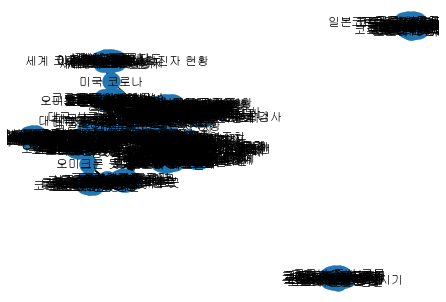

In [56]:
nx.draw(g, with_labels = True, font_family=font)
plt.show()

그래프가 굉장히 겹쳐서 보기 좋지 않은데, 어떻게 구조를 파악해야 할지를 생각해보고자 한다.

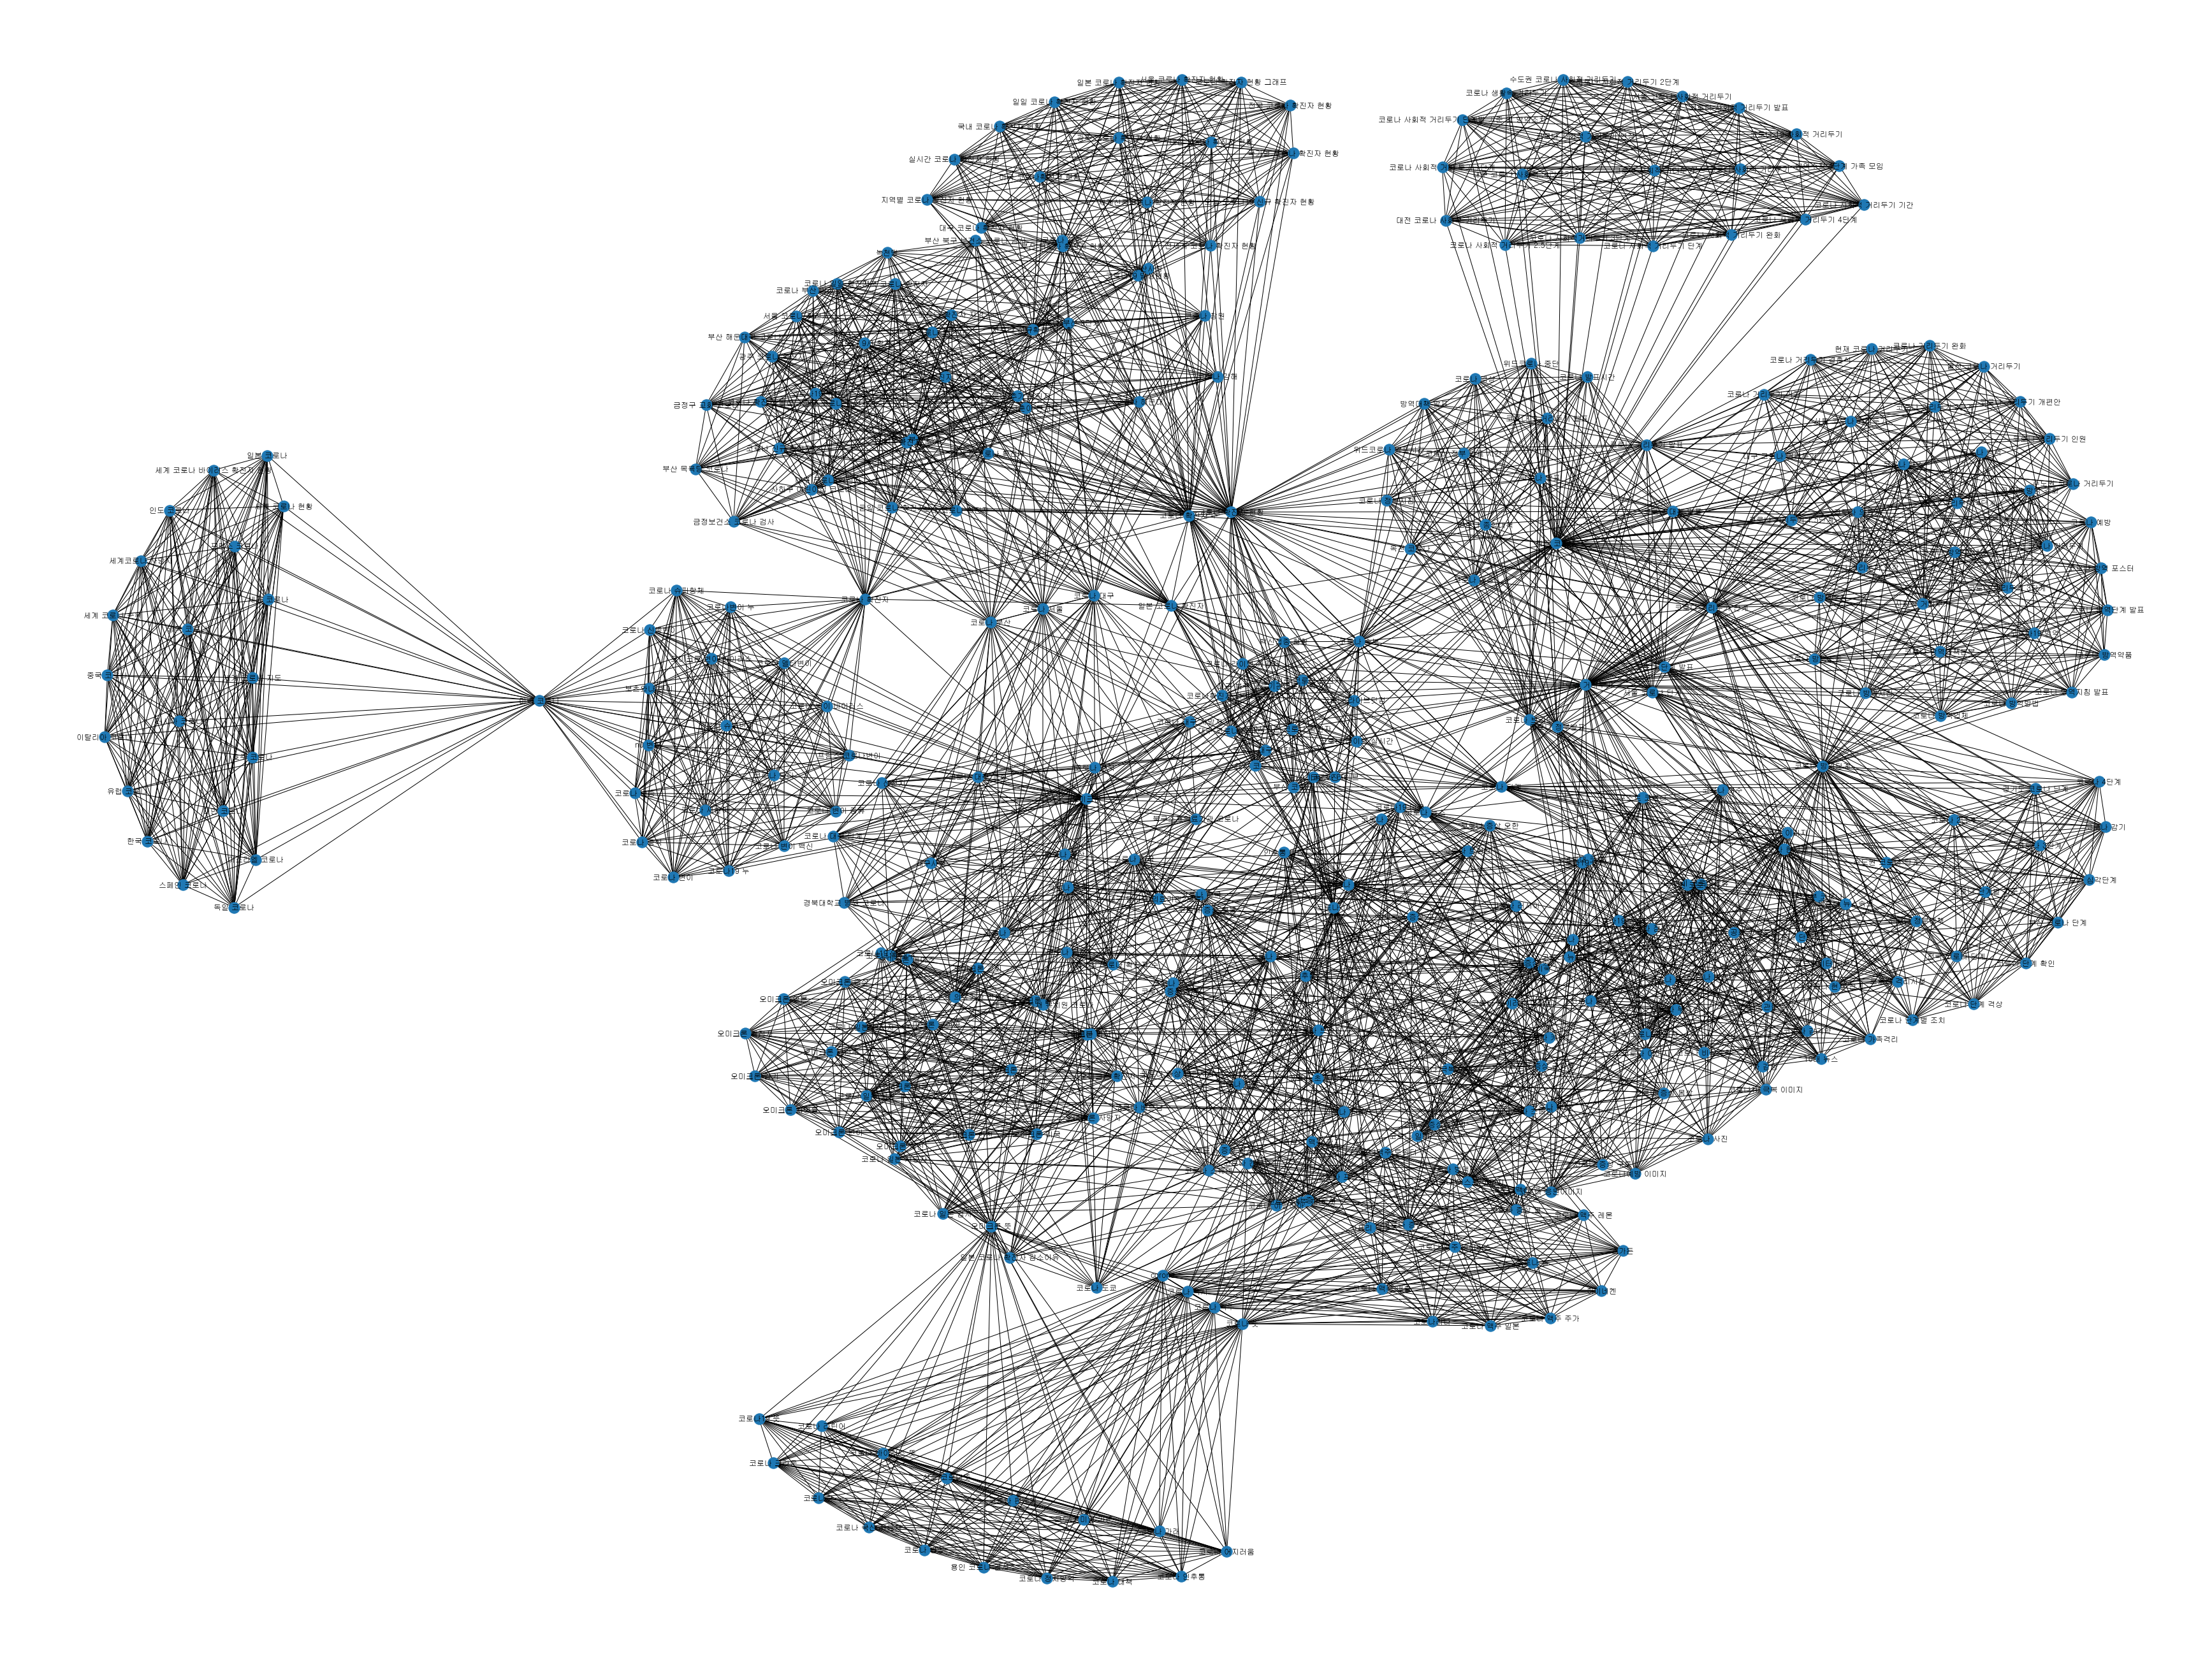

In [63]:
plt.figure(figsize = (48, 36))
pos = nx.kamada_kawai_layout(g)
nx.draw(g, pos, with_labels=True, font_family = font)
plt.show()

다음과 같이 어떤 지정된 구조를 바탕으로 구조를 분석할 수 있는 방법이 존재한다.
이를 바탕으로 구조를 파악하면 다음과 같다.

여러 묶음들을 확인할 수 있는데
- 코로나 사회적 거리두기  
- 코로나 증상  
- 오미크론 변이  
- 해외 코로나 현황
- 국내 확진자수 현황
- 코로나 맥주(?!)

이렇게 여러 묶음으로 효과적으로 표현할 수 있다.

## 시각화 방법 2 연관성 분석을 활용한다.
여기서 두 단어씩 쌍을 보아 얼마나 연관성이 있는지 볼 수 있을 것이다.

이를 위해서 연관분석 (apriori 알고리즘)을 사용한다!

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

우선 True, False로 각 줄을 만들어 줘야 하므로 transaction encoder를 활용한다.

In [5]:
# Transaction Encoder, apriori를 쓰기 위해서는 우선 data 형태가 리스트 형태로 들어와야 한다. 이를 위해 변형한다.
dataset = []
for i in range(len(data)):
    dataset.append(list(data.loc[i]))

# encoder를 적용해보자.
te = TransactionEncoder()
te_search = te.fit(dataset).transform(dataset, sparse = True)

In [6]:
te_search.shape

(64000, 365)

array 형태이므로, dataframe으로 바꿔서 상황을 보자.

In [7]:
df = pd.DataFrame.sparse.from_spmatrix(te_search, columns = te.columns_)

In [8]:
df

10대 뉴스  12월 6일 코로나 확진자 수  3차 감염  6시기준 코로나 확진자  9시기준 코로나 확진자  corona  \
0           0                 0      0             0             0       0   
1           0                 0      0             0             0       0   
2           0                 0      0             0             0       0   
3           0                 0      0             0             0       0   
4           0                 0      0             0             0       0   
...       ...               ...    ...           ...           ...     ...   
63995       0                 0      0             0             0       0   
63996       0                 0      0             0             0       0   
63997       0                 0      0             0             0       0   
63998       0                 0      0             0             0       0   
63999       0                 0      0             0             0       0   

       nu 변이  경기도 코로나 단계  경북대학교 병원 코로나  광주 코로나 확진자  ...  코로나확진자 라이브  포스트 코로나  \
0          0           0             0           0  ...           0        0   
1          0           0             0           0  ...           0        0   
2          0           0             0           0  ...           0        0   
3          0           0             0           0  ...           0        0   
4          0           0             0           0  ...           0        0   
...      ...         ...           ...         ...  ...         ...      ...   
63995      0           0             0           0  ...           0        0   
63996      0           0             0           0  ...           0        0   
63997      0           0             0           0  ...           0        0   
63998      0           0             0           0  ...           0        0   
63999      0           0             0           0  ...           0        0   

       프랑스 코로나  프랑스 코로나변이  하이네켄  한국 코로나  한국 코로나 확진자  현재 코로나 거리두기  호가든  호주 코로나  
0            0          0     0       0           0            0    0       0  
1            0          0     0       0           0            0    0       0  
2            0          0     0       0           0            0    0       0  
3            0          0     0       0           0            0    0       0  
4            0          0     0       0           0            0    0       0  
...        ...        ...   ...     ...         ...          ...  ...     ...  
63995        0          0     0       0           0            0    0       0  
63996        0          0     0       0           0            0    0       0  
63997        0          0     0       0           0            0    0       0  
63998        0          0     0       0           0            0    0       0  
63999        0          0     0       0           0            0    0       0  

[64000 rows x 365 columns]

sparse matrix가 나왔다. 이제 이를 바탕으로. apriori를 진행하려고 한다.

support가 0.005인 쌍에 대해서만 확인해보자.

In [29]:
frequent_search = apriori(df,
                          min_support = 0.005,
                          max_len = 2,
                          use_colnames = True)

여기서 우리는 길이가 2인 조합에 대해서 찾아볼 수 있을 것이다.

In [30]:
frequent_search['length'] = frequent_search['itemsets'].apply(lambda x : len(x))

In [31]:
frequent_list = frequent_search.loc[frequent_search.length == 2].sort_values('support', ascending = False)

In [33]:
frequent_list.head(5)

support                 itemsets  length
72  0.009750         (코로나 일본, 코로나 미국)       2
57  0.009750         (코로나 대구, 코로나 부산)       2
61  0.009750          (코로나 맥주, 코로나 뜻)       2
89  0.005375  (코로나 확진자 수, 코로나 확진자 현황)       2
55  0.005375       (코로나 거리두기, 위드 코로나)       2

In [41]:
tuple(list(frequent_list.itemsets)[0])

('코로나 일본', '코로나 미국')

연관성이 일정 이상인 항목들에 대해서 apriori를 확인해보자.

In [65]:
g2 = nx.Graph()
for i in range(len(frequent_list)):
    cur_edge = tuple(list(frequent_list.itemsets)[i])
    g2.add_edges_from([cur_edge])

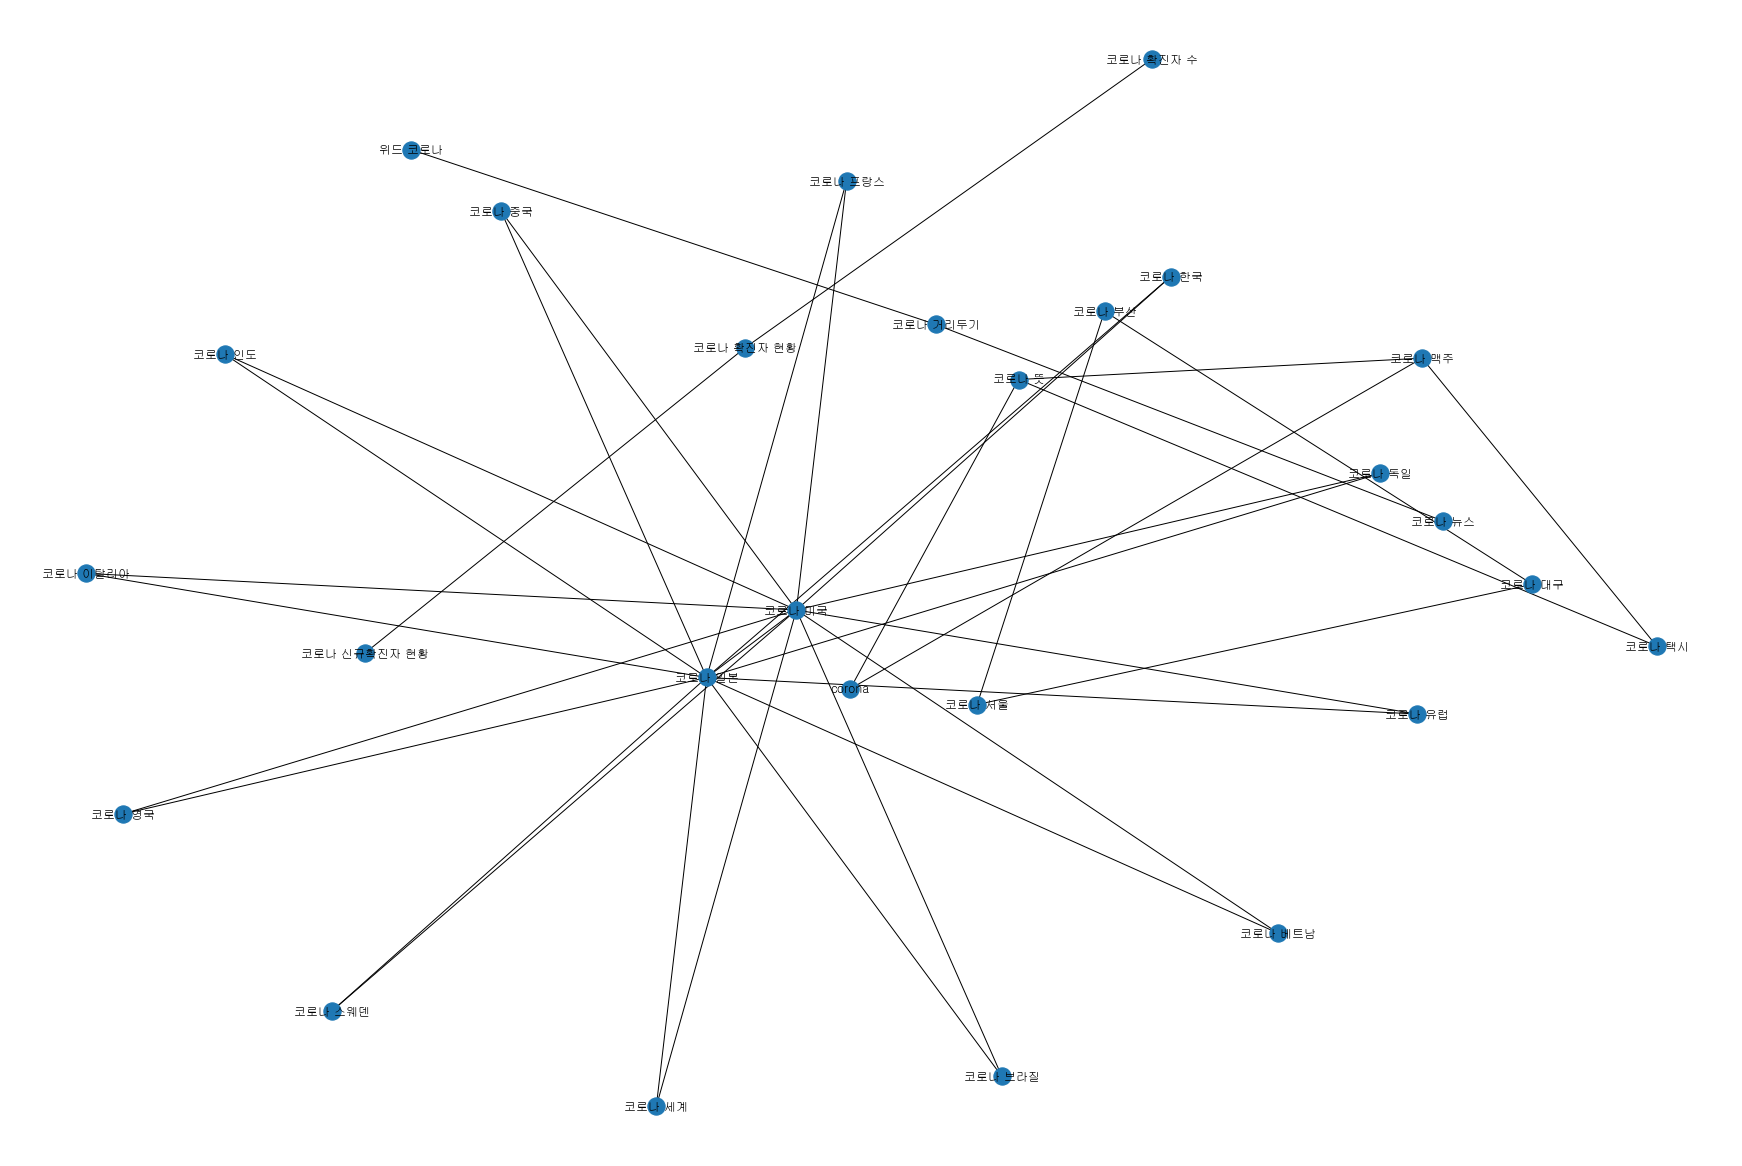

In [67]:
plt.figure(figsize = (24, 16))
pos = nx.kamada_kawai_layout(g2)
nx.draw(g2, pos, with_labels=True, font_family = font)
plt.show()

검색했을 때 가장 연관성이 높은 검색어들, 바로 이어서 검색해보는 것들은 주로 해외의 여러 국가들 관련이다.